### Conoce al Dr. Ignaz Semmelweis
Este es el Dr. Ignaz Semmelweis, un médico húngaro nacido en 1818 que trabajó en el Hospital General de Viena. Si el Dr. Semmelweis parece preocupado en la imagen, probablemente sea porque está pensando en la fiebre puerperal: una enfermedad mortal que afecta a las mujeres que acaban de dar a luz. Lo está pensando porque a principios de la década de 1840 en el Hospital General de Viena, hasta el 10% de las mujeres que daban a luz morían a causa de él. Lo está pensando porque sabe la causa de la fiebre puerperal: son las manos contaminadas de los médicos que dan a luz a los bebés. ¡Y no lo escucharán ni se lavarán las manos!

En este artículo, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia del lavado de manos. Comencemos mirando los datos que hicieron que Semmelweis se diera cuenta de que algo andaba mal con los procedimientos en el Hospital General de Viena.

In [40]:
# Importamos módulos necesarios y realizamos configuraciones
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [18, 7]


# Leemos el contenido del primer dataset, muertes anuales por clínica
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### Un alarmante número de muertes
La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Notarás que dar a luz era muy peligroso. Un número alarmante de mujeres moría como resultado del parto, la mayoría de ellas por la fiebre puerperal.

Veremos esto más claramente si observamos la proporción de muertes entre el número de mujeres que dieron a luz. Hagamos el cálculo para la Clínica 1.

In [41]:
# Calculamos la proporción de muertes por cantidad de nacimientos
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extraemos la información en dos DataFrames separados
yearly1 = yearly[yearly["clinic"] == "clinic 1"]
yearly2 = yearly[yearly["clinic"] == "clinic 2"]

# Veamos el primero
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


### Muerte en las clínicas
Si ahora graficamos la proporción de muertes tanto en la clínica 1 como en la clínica 2, veremos un patrón curioso ...

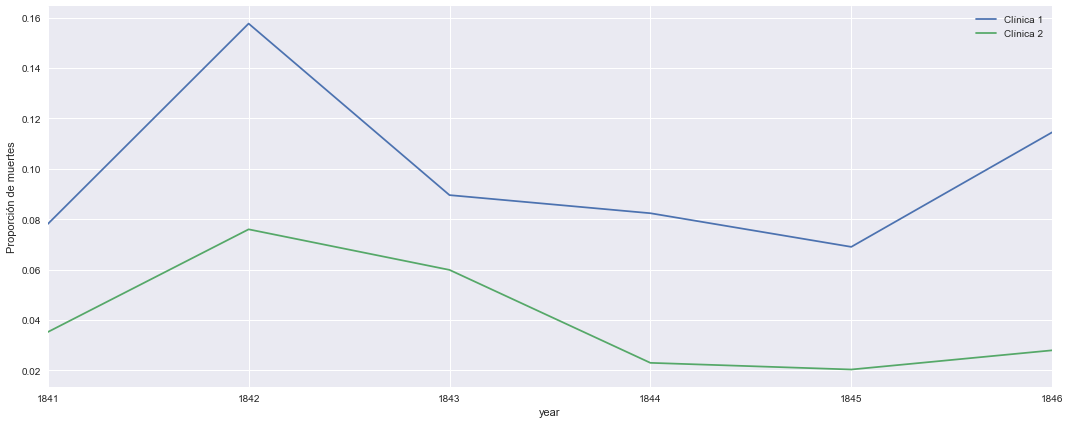

In [42]:
# Graficamos la proporcion de muertes para cada clínica en la misma figura
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clínica 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clínica 2", ax=ax)

ax.set_ylabel("Proporción de muertes")

plt.show()

### Comienza el lavado de manos
¿Por qué la proporción de muertes constantemente es mucho más alta en la Clínica 1? Semmelweis vio el mismo patrón y quedó perplejo y angustiado. La única diferencia entre las clínicas era que muchos estudiantes de medicina servían en la Clínica 1, mientras que la mayoría de las parteras estudiaban en la Clínica 2. Mientras que las parteras solo atendían a las mujeres que daban a luz, los estudiantes de medicina también pasaban tiempo en las salas de autopsias examinando cadáveres.

Semmelweis comenzó a sospechar que algo en los cadáveres, que se transmitía a través de las manos de los estudiantes de medicina, causaba la fiebre puerperal. Entonces, en un intento desesperado por detener las altas tasas de mortalidad, decretó: **¡Lávate las manos!** Esta fue una solicitud poco ortodoxa y controvertida, nadie en Viena sabía sobre bacterias en este momento.

Carguemos datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.

In [43]:
# Leemos el segundo dataset, muertes mensuales.
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=["date"])

# Calculemos la proporción de muertes por nro. de nacimientos
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Veamos un poco
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### El efecto del lavado de manos
Con los datos cargados, ahora podemos ver la proporción de muertes a lo largo del tiempo. En el diagrama a continuación, no es necesario marcar dónde comenzó el lavado de manos obligatorio, ¡redujo la proporción de muertes a tal grado que deberías poder detectarlo!

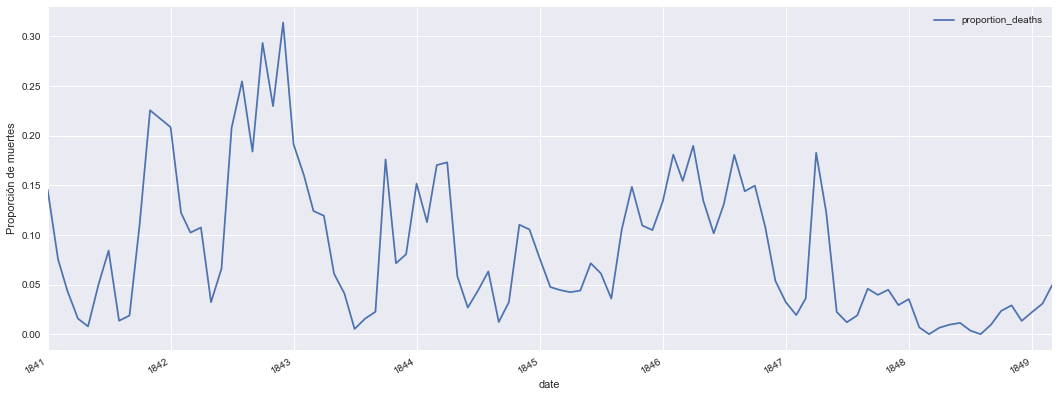

In [44]:
# Generamos gráfico
ax = monthly.plot(x="date", y="proportion_deaths")

ax.set_ylabel("Proporción de muertes")

plt.show()

A partir del verano de 1847, la proporción de muertes se reduce drásticamente y, sí, esto fue cuando Semmelweis hizo obligatorio el lavado de manos.

El efecto del lavado de manos se hace aún más claro si resaltamos esto en el gráfico.

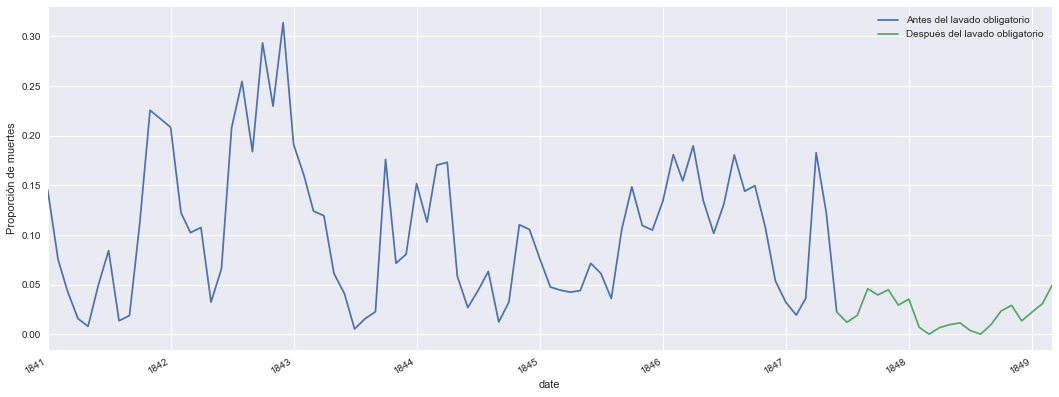

In [45]:
# Fecha en que el lavado de manos se hizo obligatorio
handwashing_start = pd.to_datetime("1847-06-01")

# Dividimos el DataFrame antes y despues de esa fecha
before_washing = monthly[monthly["date"] <= handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Graficamos ambos DataFrames sobre la misma figura
ax = before_washing.plot(x="date", y="proportion_deaths", label="Antes del lavado obligatorio")
after_washing.plot(x="date", y="proportion_deaths", label="Después del lavado obligatorio", ax=ax)

ax.set_ylabel("Proporción de muertes")

plt.show()

### ¿Más lavado de manos, menos muertes?
Nuevamente, el gráfico muestra que el lavado de manos tuvo un gran efecto. ¿Cuánto redujo la proporción mensual de muertes en promedio?

In [46]:
# Diferencia en promedio de la proporción mensual de muertes, como consecuencia del lavado de manos
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()

print("Diferencia promedio: " + str(mean_diff))

Diferencia promedio: -0.08288307604550099


### Un análisis Bootstrap de los datos

Como vemos, ¡redujo la proporción de muertes en alrededor de 8 puntos porcentuales! Del 10% en promedio a solo el 2% (que sigue siendo un número alto para los estándares modernos).

Para tener una idea de la incertidumbre acerca de cuánto reduce la mortalidad lavarse las manos, podríamos observar a un intervalo de confianza (aquí calculado usando el [método bootstrap](https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica))).

In [47]:
# Un analisis bootstrap de la reducción de muertes como consecuencia del lavado de manos
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculamos un intervalo de confianza de 95% a partir de la diferencia promedio 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])

print(confidence_interval)

0.025   -0.100099
0.975   -0.066139
dtype: float64


### Conclusión y el destino del Dr. Semmelweis
Por lo tanto, el lavado de manos redujo la proporción de muertes entre 6,7 y 10 puntos porcentuales, de acuerdo con un intervalo de confianza del 95%. En general, parece que Semmelweis tenía pruebas sólidas de que el lavado de manos era un procedimiento simple pero muy efectivo que podía salvar muchas vidas.

La tragedia es que, a pesar de la evidencia, los científicos contemporáneos ridiculizaron la teoría de Semmelweis: que la fiebre puerperal era causada por alguna "sustancia" (lo que hoy conocemos como bacterias) de los cadáveres de las salas de autopsias. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar el Hospital General de Viena para siempre.

Una razón para esto fue que las estadísticas y los argumentos estadísticos eran poco comunes en la ciencia médica en el siglo XIX. Semmelweis solo publicó sus datos como largas tablas de datos en bruto, pero no mostró gráficos ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de armar, podría haber tenido más éxito en hacer que los médicos vieneses se laven las manos.